In [ ]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

def cross_entropy_error(y, t):
    if y.ndim ==1:
        t=t.reshape(1, t.size)
        y=y.reshape(1, y.size)

    batch_size = y.shape[0]
    delta = 1e-7
    return -np.sum(t*np.log(y+delta)) / batch_size

class XORTwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}

        batch_num = x.shape[0]

        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        # backward
        dy = (y - t) / batch_num     # softmax

        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)

        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads


In [ ]:
desired = np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,0]])

for i in range(96):
    num1 = round(rd.uniform(0.0, 0.4), 2)
    num2 = round(rd.uniform(0.0, 0.4), 2)
    arr=[rd.randrange(2)+num1, rd.randrange(2)+num2, 0]
    desired= np.append(desired, [arr], axis=0)

d = desired[:, 2:]
x = desired[:,:1]
y = desired[:,1:2]
for i in range(0,9):
    k = y[i][0]-x[i][0]+0.5
    p = y[i][0]-x[i][0]-0.5
    if k > 0 and p <0:
        d[i][0] = 0
    else:
        d[i][0] = 1



x_train = desired[:,:2]
t_train = desired[:,2:]



In [ ]:
test = np.array([[0,0,0]])
for i in range(30):
    num1 = round(rd.uniform(0.0, 0.4), 2)
    num2 = round(rd.uniform(0.0, 0.4), 2)
    arr=[rd.randrange(2)+num1, rd.randrange(2)+num2, 0]
    test= np.append(test, [arr], axis=0)

d = test[:, 2:]
x = test[:,:1]
y = test[:,1:2]
for i in range(0,9):
    k = y[i][0]-x[i][0]+0.5
    p = y[i][0]-x[i][0]-0.5
    if k > 0 and p <0:
        d[i][0] = 0
    else:
        d[i][0] = 1

x_test = test[:,:2]
t_test = test[:,2:]

i= 0 train acc, test acc | 1.0, 1.0
i= 20 train acc, test acc | 1.0, 1.0
i= 40 train acc, test acc | 1.0, 1.0
i= 60 train acc, test acc | 1.0, 1.0
i= 80 train acc, test acc | 1.0, 1.0
i= 100 train acc, test acc | 1.0, 1.0
i= 120 train acc, test acc | 1.0, 1.0
i= 140 train acc, test acc | 1.0, 1.0
i= 160 train acc, test acc | 1.0, 1.0
i= 180 train acc, test acc | 1.0, 1.0
i= 200 train acc, test acc | 1.0, 1.0
i= 220 train acc, test acc | 1.0, 1.0
i= 240 train acc, test acc | 1.0, 1.0
i= 260 train acc, test acc | 1.0, 1.0
i= 280 train acc, test acc | 1.0, 1.0


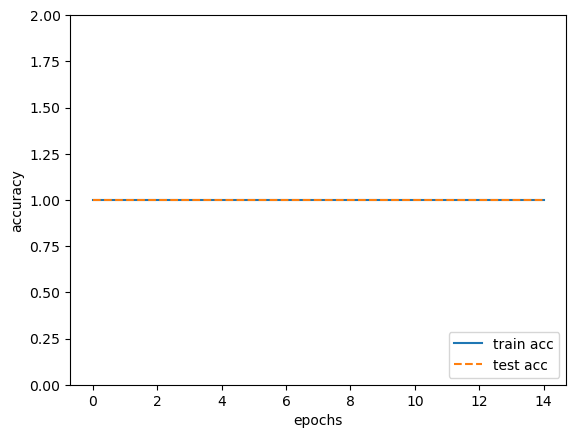

In [ ]:
network = XORTwoLayerNet(input_size=2, hidden_size=2, output_size=1)

iters_num = 300  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 5   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    #print('x_batch =', x_batch.shape)
    #print('W1 =', network.params['W1'].shape)

    noise = np.random.rand(100).astype(np.float32)
    np.zeros_like(noise)


    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("i=", i, "train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

        markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 2.0)
plt.legend(loc='lower right')
plt.show()

[-0.61661316  0.38338684  0.41987967 -0.58012033  0.42956833  0.38705257
 -0.61374803 -0.57674158  0.42617084 -0.57625679]
[0.61661316 0.61661316 0.58012033 0.58012033 0.57043167 0.61294743
 0.61374803 0.57674158 0.57382916 0.57625679]
